### Strok Prediction Data Science Career Track final project by Albert Cort Banke
_____________________________________________________________________________________________________________________________________________

Project scope

***Goal***: To draw insights from the stroke dataset and illustrate interesting features by answering questions with visualizations and summary statistics as well as using ML to predict strokes

***Data***: There is one dataset. The data is about health of patients occuring strokes and the features associated with incurring a stroke 

***Analysis***: The project composes an exploratory data analysis and hypothesis testing to assess the data and determine associations in the data. Following this, the usage of supervised machine learning models helps predict what features are important to determine strokes

***Questions***: What is the most telling feature of a stroke?

_____________________________________________________________________________________________________________________________________________

**1. Preparation**

Import the relevant libraries (A) and import and read the data (B)

In [2]:
# (A)
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
# (B)
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Print the first few observations to check the data has been imported correctly

print(stroke.head())

# The datasets look correct at first glance. There are som blank values seen from line 1 in the bmi column, which has a NaN message.
# An overview of the variables included in the dataset is below. Columns datatypes is attached to each attribute
# 1) id: unique identifier - continuous integer
# 2) gender: "Male", "Female" or "Other" - nominal categorical 
# 3) age: age of the patient - continuous integer
# 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension - binary integer
# 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease - binary integer
# 6) ever_married: "No" or "Yes"- binary categorical
# 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"- nominal categorical
# 8) Residence_type: "Rural" or "Urban" - binary categorical
# 9) avg_glucose_level: average glucose level in blood - continuous integer
# 10) bmi: body mass index - continuous integer
# 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* - nominal categorical
# 12) stroke: 1 if the patient had a stroke or 0 if not - binary integer

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [4]:
# Check for missing values in the datasets

print(stroke.info())

# The BMI attribute has an overload of missing entries. The other columns in the species dataset appears complete

# There is a total of 5109 entries in the dataset, excluding headers

# From the info() header we see that the data almost has an event split between the object and integer datatypes 
# This means half of the data is strings or text while the other is numerical
# This is important to note beacause it affects which visualisations and statistics are wise to use 

# Let us inspect the text columns to find out whether any missing values have snuck in as texted values

text_column_values = stroke[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]].values.ravel()
unique_values =  pd.unique(text_column_values)
print(unique_values)

# This reveals multiple alerts needing to be adressed with data transformation
# 1) An 'unknown' answer exists in the smoking_status column, which needs to be removed
# 2) Both the attribute header 'Residence_type' and values in many of the categorical columns have upper case letters. To ensure 
# better computability the transformation should lowercase all inputs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
['Male' 'Yes' 'Private' 'Urban' 'formerly smoked' 'Female' 'Self-employed'
 'Rural' 'never smoked' 'smokes' 'No' 'Unknown' 'Govt_job' 'children'
 'Never

2. Data transformation

Prepare (C) the dataset and review (D) it for the exploratory data analysis

In [11]:
# (C) Prepare the dataset by transforming unnecessary features and elements

# Streamline the columns in lowercase letters
stroke.columns = stroke.columns.str.lower()

# Streamline the values into lowercase letters if the value is a string
stroke = stroke.applymap(lambda s: s.lower() if type(s) == str else s)

# Remove blank spaces and replace with underscores
stroke = stroke.replace(' ','_', regex=True)

# Drop rows with missing values
stroke = stroke.dropna()

# Print to check all of the above has been implemented
print(stroke.head())
print(stroke.isnull().sum())

# Data transformation is completed and the project can move on to analyse

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    male  67.0             0              1          yes   
2  31112    male  80.0             0              1          yes   
3  60182  female  49.0             0              0          yes   
4   1665  female  79.0             1              0          yes   
5  56669    male  81.0             0              0          yes   

       work_type residence_type  avg_glucose_level   bmi   smoking_status  \
0        private          urban             228.69  36.6  formerly_smoked   
2        private          rural             105.92  32.5     never_smoked   
3        private          urban             171.23  34.4           smokes   
4  self-employed          rural             174.12  24.0     never_smoked   
5        private          urban             186.21  29.0  formerly_smoked   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1  
id                   0
gender               0
age       

<Figure size 720x432 with 0 Axes>

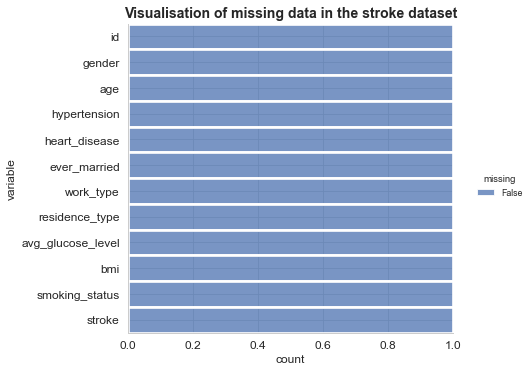

<Figure size 432x288 with 0 Axes>

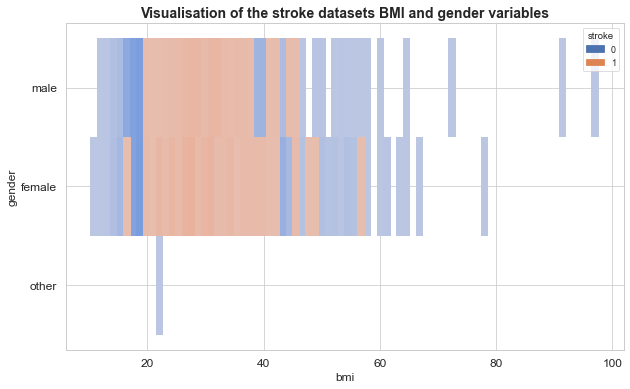

<Figure size 432x288 with 0 Axes>

In [15]:
# (D) Review the dataset by graphically looking at its vitals and testing a graph to see if the data has been transformed well

# Checking for missing data

sns.color_palette('husl')
sns.set(style = 'whitegrid', font_scale = 1.5)
sns.set_context('paper')

plt.figure(figsize=(10,6))
sns.displot(data = stroke.isna().melt(value_name="missing"),
            y='variable',
            hue = 'missing',
            multiple='fill',
            aspect=1.25
            )

plt.title('Visualisation of missing data in the stroke dataset', fontsize= 14, fontweight="bold")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('count', fontsize = 12)
plt.ylabel('variable', fontsize = 12)

plt.show()
plt.clf()

# The visalization showcase a complete dataset

# Making a simple histplot with Seaborn

plt.figure(figsize=(10,6))

sns.histplot(stroke, x='bmi', y = 'gender', hue = 'stroke', legend=True)

plt.title('Visualisation of the stroke datasets BMI and gender variables', fontsize= 14, fontweight="bold")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('bmi', fontsize = 12)
plt.ylabel('gender', fontsize = 12)

plt.show()
plt.clf()

# Looks good - the project moves on showcase the summary statistics


3. Exploratory Data Analysis

This section consists of two parts. The first is a summary (E) of the statistical aspects of the data. The second is visualization (F) module, which consists of univariate, bivariate, and multivariate analysis.  

In [16]:
# (E) Summary statistics with Pandas .describe() function

print(stroke.describe())

                 id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865374      0.091872       0.049501   
std    20995.098457    22.555115      0.288875       0.216934   
min       77.000000     0.080000      0.000000       0.000000   
25%    18605.000000    25.000000      0.000000       0.000000   
50%    37608.000000    44.000000      0.000000       0.000000   
75%    55220.000000    60.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4909.000000  4909.000000  4909.000000  
mean          105.305150    28.893237     0.042575  
std            44.424341     7.854067     0.201917  
min            55.120000    10.300000     0.000000  
25%            77.070000    23.500000     0.000000  
50%            91.680000    28.100000     0.000000  
75%           113.570000    33.100000     0

Interpretation of the statistics

First one should notice that the code only present us with the quantitative variables. 

***Count:*** The specified amount of data in our dataset is now 4909 instances. The transformation excluded all the missing rows, thus a reduction in the sum. This change is a loss of under 5% of the total sum of data, and the project accepts this as a loss not too large to compromise the quality of the dataset.

***Age:*** The mean age is 42.86 years, the youngest age is 0.08 years while the eldest age is 82. This indicates that the dataset is representative of different age groups and not biased towards elder people for example.

***Avg_glucose_level:*** The average glucose level is 105, which is the average of the of all the patients average. The std. deviation is 44, a rather high value and the min/max values of 55 and 271 indicates a high difference in values. This should be analyzed visually as well.

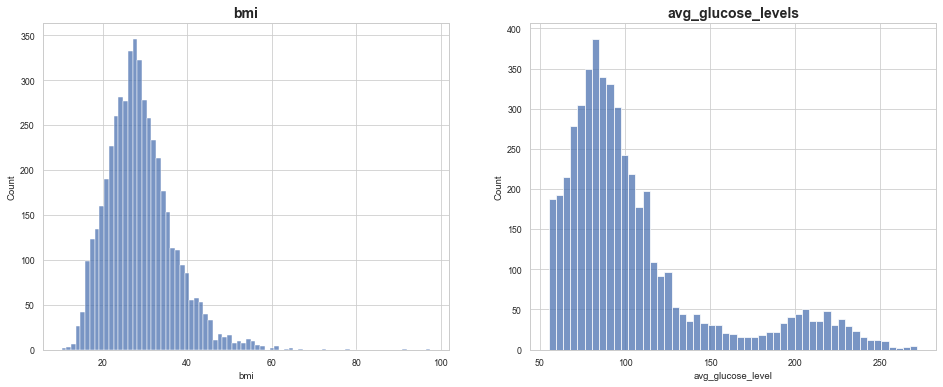

<Figure size 432x288 with 0 Axes>

In [18]:
# (F) Univariate data analysis

# Plotting a histogram of bmi and avg_glucose_level 

plt.figure(figsize = [16, 6])

plt.subplot(1, 2, 1)
ax = sns.histplot(data = stroke, x='bmi')

plt.title('bmi', fontsize = 14, fontweight="bold")

# Interpretation: The histogram has quite some distance between the largest and smallest observations. Looking back at the st. dev we see size of 78.28. Largest of all parks.
# This could indicate that the park hosts many different species (mammals, plants etc.) This could also indicate outliers of species not present in other parks. 

plt.subplot(1, 2, 2)

ax1 = sns.histplot(data = stroke, x='avg_glucose_level')
plt.title('avg_glucose_levels', fontsize = 14, fontweight="bold")
plt.show()
plt.clf()

# Interpretation: The bmi and glucose variable is right-skewed. We do not have normal distributions in either of the graphs. This is important to note, and could be due to sampling issues
# This indicates that there are outliers. 



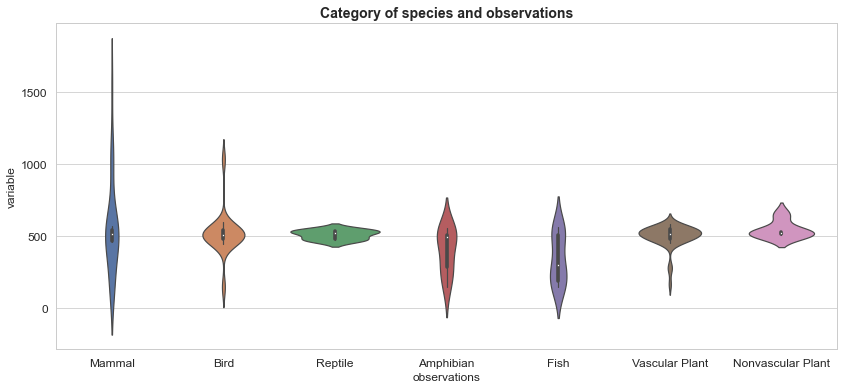

<Figure size 432x288 with 0 Axes>

In [ ]:
# (F) Bivariate data analysis

# Plotting a violinplot of category and number of observations 

plt.figure(figsize=(14,6))
sns.violinplot(data = biodiversity, x = 'category', y = 'total_observations')

plt.title('Category of species and observations', fontsize= 14, fontweight="bold")

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlabel('observations', fontsize = 12)
plt.ylabel('variable', fontsize = 12)


plt.show()
plt.clf()

# Interpretation: We see that the median for most of the categories lie around 500 with the exception of fish where it is closer to 300
# This implies much of the data is split around the 500 mark, where 50% of the data is below and the other 50% is below this mark. 
# The mammals and birds have the most outliers and thus range of observations. Reptiles, however, is very narrow in its interquartile ranges. 
# In other words, the different species of reptiles are observed at same rates. 
# Nonvascular plants has the most narrow violin. This could imply few obsevations. Furthermore the data looks left-skewed as seen from the distribution below. 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


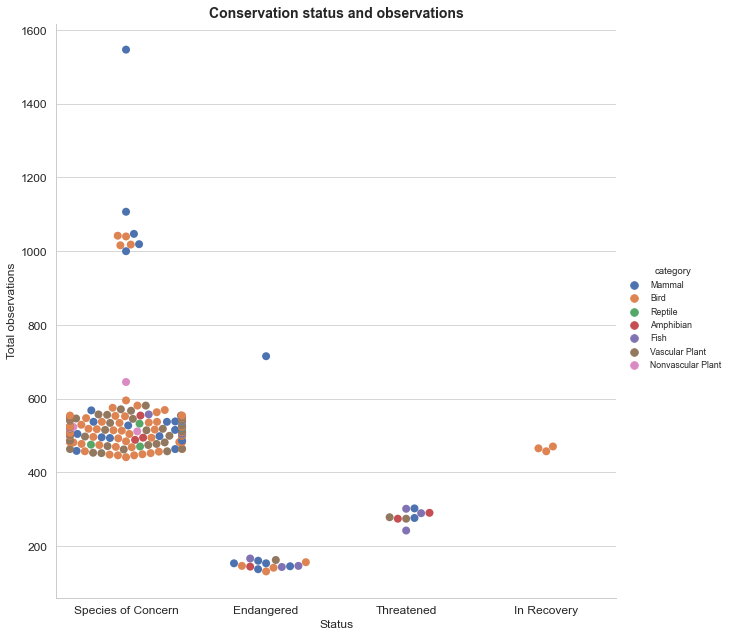

<Figure size 432x288 with 0 Axes>

In [ ]:
# (F) Multivariate analysis

sns.catplot(data = biodiversity, x = 'conservation_status', y = 'total_observations', hue = 'category', kind = 'swarm', height = 8.5, s = 8)


plt.title('Conservation status and observations', fontsize= 14, fontweight="bold")

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlabel('Status', fontsize = 12)
plt.ylabel('Total observations', fontsize = 12)


plt.show()
plt.clf()

# Interpretation: The catplot highlights that most of the items are in the 'Species of Concern' status. Meanwhile the 'In Recovery' status holds the least items. 

4. Questions

Q1 In what ways do species represent biodiversity? Q2 What parks have the most biodiversity? 

In [ ]:
# Q1: 

print(biodiversity['category'].value_counts())

# Birds and vascular plants represent most of the data and thus the observed biodiversity. Reptiles and nonvascular plants has the least features. What is interesting is that birdwatching is very popular
# Meanwhile reptile watching is not procclaimed to be in the same league as the above. This could induce bias as the most watched species is perhaps the species which most people look for
# Biodiversity is represented as the distribution between natural inhabitants and elements in certain areas. Thus, it is important to note that what one park might consider a part of their 
# biodiversity another park wold not perhaps consider a part of theirs. 

Bird                 75
Vascular Plant       46
Mammal               30
Fish                 10
Amphibian             7
Nonvascular Plant     5
Reptile               5
Name: category, dtype: int64


16099
11177
38663
23356


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


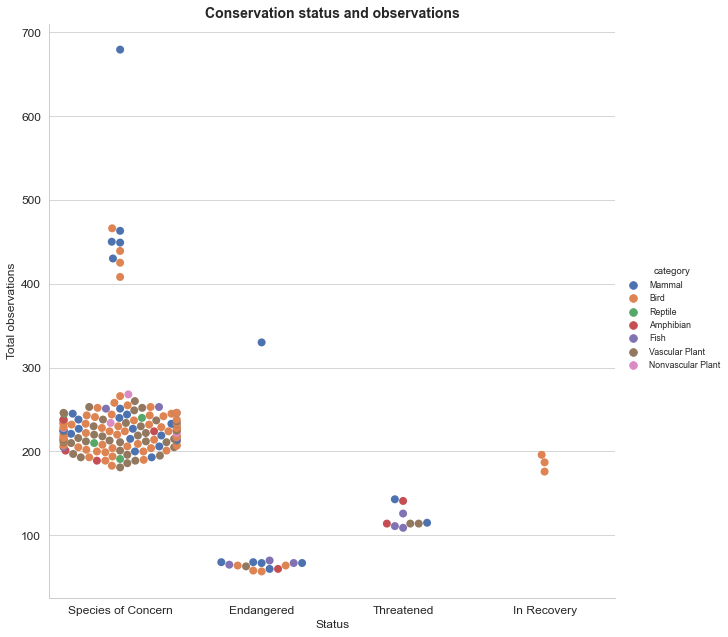

<Figure size 432x288 with 0 Axes>

In [ ]:
# Q2: 

# Finding the park with the most observations        

list = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']

for items in list:
    print(biodiversity[items].sum())        
        
# Park number 3, Yellowstone National Park, holds the most observations. It would be interesting if we could dense the observations to find observations per squarekilometer 
# However, these 38663 observations in Yellowstone National Park could be unevenly distributed amongst the different kind of categories above. Lets check this. The


sns.catplot(data = biodiversity, x = 'conservation_status', y = 'Yellowstone National Park', hue = 'category', kind = 'swarm', height = 8.5, s = 8)


plt.title('Conservation status and observations', fontsize= 14, fontweight="bold")

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlabel('Status', fontsize = 12)
plt.ylabel('Total observations', fontsize = 12)


plt.show()
plt.clf()



In [ ]:
# As the graph showcases all categories are present and the pattern observed for all parks with birds being the most common observation seems to hold. '
# Thus, we must conclude, that the Yellowstone National Park holds the most observations, and does not have any indication of not being the most biodiverse park

5. Conclusion

The analysis has showcased how species vary amongst obsverations and parks. Plants seems to be less observed, meanwhile birds are species of interest. This is important to spell out, as the source of the observations is important to the data represented. 

Further investigations should aim to couple the data with geographical dimensions to further strengthen the biodiversity hypothesis. For example, to find the park that holds the most biodiveristy pr square kilometer. 